In [106]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
rf = pd.read_csv("rf_final_results.csv")
gb = pd.read_csv('GB_results.csv')
dt_lr_b = pd.read_csv('results_dt_lr_b.csv')

In [109]:
models = pd.concat([rf, gb, dt_lr_b])

In [110]:
models.shape

(652, 32)

In [111]:
summary = pd.pivot_table(models,
                         index=['model_type', 'split_date'],
                         aggfunc='max',
                         fill_value=0)
f1_list = ['f1_at_1', 'f1_at_2', 'f1_at_5',
           'f1_at_10', 'f1_at_20', 'f1_at_30', 'f1_at_50']
p_list = ['p_at_1', 'p_at_2', 'p_at_5', 
          'p_at_10', 'p_at_20', 'p_at_30', 'p_at_50']
recall_list = ['recall_at_1', 'recall_at_2', 'recall_at_5', 
               'recall_at_10', 'recall_at_20', 'recall_at_30', 'recall_at_50']

# Checking precision over time for each classifier

In [112]:
precision_summary = summary.reset_index()
precision_summary[['model_type', 'clf', 'split_date', 'p_at_10']].sort_values('p_at_10', ascending=False)

,model_type,clf,split_date,p_at_10
14,LR,"LogisticRegression(C=10, class_weight=None, du...",2015-01-01,0.556962
12,LR,"LogisticRegression(C=10, class_weight=None, du...",2013-01-01,0.556962
10,GB,GradientBoostingClassifier(criterion='friedman...,2015-01-01,0.544304
6,DT,"DecisionTreeClassifier(class_weight=None, crit...",2015-01-01,0.544304
19,RF,"RandomForestClassifier(bootstrap=True, class_w...",2016-01-01,0.544304
4,DT,"DecisionTreeClassifier(class_weight=None, crit...",2013-01-01,0.544304
8,GB,GradientBoostingClassifier(criterion='friedman...,2013-01-01,0.506329
15,LR,"LogisticRegression(C=10, class_weight=None, du...",2016-01-01,0.506329
16,RF,"RandomForestClassifier(bootstrap=True, class_w...",2013-01-01,0.506329
18,RF,"RandomForestClassifier(bootstrap=True, class_w...",2015-01-01,0.493671


In [113]:
#precision_summary[['model_type', 'clf', 'split_date', 'p_at_10']].sort_values('p_at_10', ascending=False).head(5).values

# Plot

In [114]:
precision_to_plot = precision_summary[["split_date", "p_at_10", "model_type"]].copy()

### Baseline construction

In [115]:
baseline = pd.read_csv('baseline.csv')
baseline.rename(columns={'filing_year': 'split_date', 'correct_with_baseline': 'p_at_10'}, inplace=True)
baseline = baseline.loc[baseline['split_date'].isin(['2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01'])]
baseline['model_type'] = 'Baseline'
precision_to_plot = pd.concat([precision_to_plot, baseline], join='inner')

In [116]:
random_baseline = models.groupby('split_date').random_baseline.mean()
random_baseline = random_baseline.to_frame().reset_index()
random_baseline.rename(columns={'random_baseline': 'p_at_10'}, inplace=True)
random_baseline['model_type'] = 'Random Baseline'
precision_to_plot = pd.concat([precision_to_plot, random_baseline])

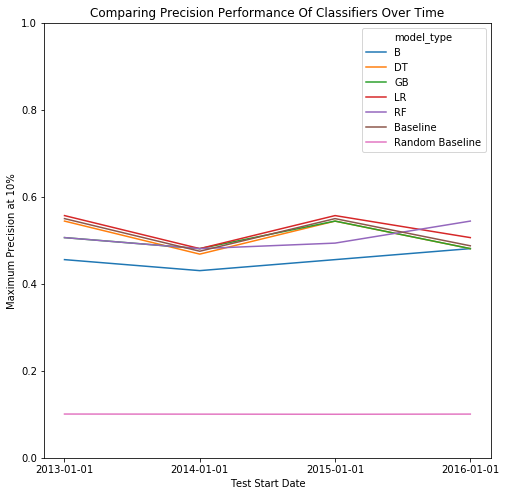

In [117]:
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x="split_date", y="p_at_10", hue="model_type",
             data=precision_to_plot, ax=ax)
ax.set_ylim(0, 1)
ax.set_xlabel("Test Start Date")
ax.set_ylabel("Maximum Precision at 10%")
ax.set_title("Comparing Precision Performance Of Classifiers Over Time")
plt.show()

In [118]:
summary[p_list].sort_values(by='p_at_10', ascending=False)

p_at_1    p_at_2    p_at_5   p_at_10   p_at_20  \
model_type split_date                                                     
LR         2015-01-01  0.857143  0.733333  0.666667  0.556962  0.383648   
           2013-01-01  0.857143  0.866667  0.666667  0.556962  0.377358   
GB         2015-01-01  0.857143  0.800000  0.589744  0.544304  0.358491   
DT         2015-01-01  0.714286  0.733333  0.487179  0.544304  0.339623   
RF         2016-01-01  1.000000  1.000000  0.641026  0.544304  0.421384   
DT         2013-01-01  0.714286  0.600000  0.461538  0.544304  0.339623   
GB         2013-01-01  0.857143  0.733333  0.641026  0.506329  0.389937   
LR         2016-01-01  1.000000  0.866667  0.589744  0.506329  0.433962   
RF         2013-01-01  0.857143  0.666667  0.564103  0.506329  0.383648   
           2015-01-01  1.000000  0.800000  0.589744  0.493671  0.383648   
DT         2016-01-01  1.000000  0.800000  0.564103  0.481013  0.377358   
GB         2014-01-01  1.000000  0.733333  0.564103  0.481013  0.352201   
           2016-01-01  1.000000  0.733333  0.589744  0.481013  0.383648   
B          2016-01-01  1.000000  0.866667  0.512821  0.481013  0.396226   
LR         2014-01-01  0.857143  0.800000  0.538462  0.481013  0.352201   
RF         2014-01-01  1.000000  0.866667  0.589744  0.481013  0.358491   
DT         2014-01-01  1.000000  0.733333  0.564103  0.468354  0.333333   
B          2015-01-01  0.714286  0.666667  0.512821  0.455696  0.345912   
           2013-01-01  0.571429  0.600000  0.538462  0.455696  0.333333   
           2014-01-01  0.714286  0.600000  0.564103  0.430380  0.358491   

                        p_at_30   p_at_50  
model_type split_date                      
LR         2015-01-01  0.301255  0.200501  
           2013-01-01  0.298319  0.198992  
GB         2015-01-01  0.301255  0.200501  
DT         2015-01-01  0.297071  0.200501  
RF         2016-01-01  0.323529  0.201005  
DT         2013-01-01  0.306723  0.201511  
GB         2013-01-01  0.294118  0.201511  
LR         2016-01-01  0.323529  0.201005  
RF         2013-01-01  0.315126  0.196474  
           2015-01-01  0.309623  0.197995  
DT         2016-01-01  0.302521  0.201005  
GB         2014-01-01  0.292887  0.201005  
           2016-01-01  0.319328  0.201005  
B          2016-01-01  0.315126  0.201005  
LR         2014-01-01  0.301255  0.201005  
RF         2014-01-01  0.313808  0.201005  
DT         2014-01-01  0.292887  0.201005  
B          2015-01-01  0.292887  0.200501  
           2013-01-01  0.298319  0.201511  
           2014-01-01  0.292887  0.201005

# Checking recall over time for each classifier

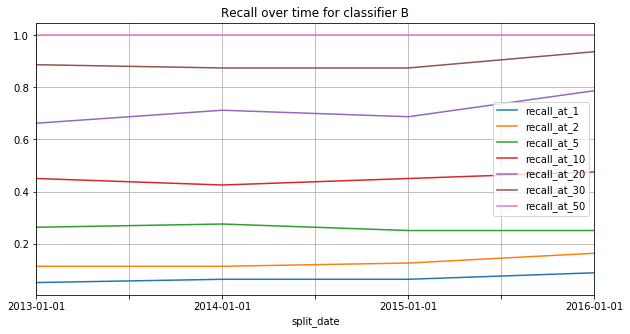

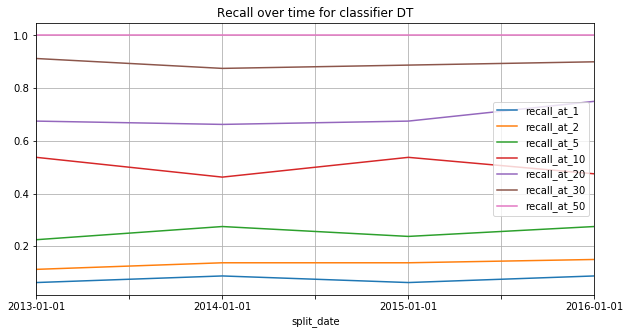

In [119]:
m = 0
n = 4
while n < 10:
    df = summary[recall_list].reset_index().iloc[m:n]
    df.set_index('split_date').plot(figsize = (10,5), 
                                grid = True, 
                                title = "Recall over time for classifier {}".format(df['model_type'].iloc[0]))
    plt.show()
    m += 4
    n += 4

In [120]:
summary[recall_list].sort_values(by='recall_at_10', ascending=False)

recall_at_1  recall_at_2  recall_at_5  recall_at_10  \
model_type split_date                                                        
LR         2015-01-01       0.0750       0.1375       0.3250        0.5500   
           2013-01-01       0.0750       0.1625       0.3250        0.5500   
GB         2015-01-01       0.0750       0.1500       0.2875        0.5375   
DT         2015-01-01       0.0625       0.1375       0.2375        0.5375   
RF         2016-01-01       0.0875       0.1875       0.3125        0.5375   
DT         2013-01-01       0.0625       0.1125       0.2250        0.5375   
GB         2013-01-01       0.0750       0.1375       0.3125        0.5000   
LR         2016-01-01       0.0875       0.1625       0.2875        0.5000   
RF         2013-01-01       0.0750       0.1250       0.2750        0.5000   
           2015-01-01       0.0875       0.1500       0.2875        0.4875   
DT         2016-01-01       0.0875       0.1500       0.2750        0.4750   
GB         2014-01-01       0.0875       0.1375       0.2750        0.4750   
           2016-01-01       0.0875       0.1375       0.2875        0.4750   
B          2016-01-01       0.0875       0.1625       0.2500        0.4750   
LR         2014-01-01       0.0750       0.1500       0.2625        0.4750   
RF         2014-01-01       0.0875       0.1625       0.2875        0.4750   
DT         2014-01-01       0.0875       0.1375       0.2750        0.4625   
B          2015-01-01       0.0625       0.1250       0.2500        0.4500   
           2013-01-01       0.0500       0.1125       0.2625        0.4500   
           2014-01-01       0.0625       0.1125       0.2750        0.4250   

                       recall_at_20  recall_at_30  recall_at_50  
model_type split_date                                            
LR         2015-01-01        0.7625        0.9000        1.0000  
           2013-01-01        0.7500        0.8875        0.9875  
GB         2015-01-01        0.7125        0.9000        1.0000  
DT         2015-01-01        0.6750        0.8875        1.0000  
RF         2016-01-01        0.8375        0.9625        1.0000  
DT         2013-01-01        0.6750        0.9125        1.0000  
GB         2013-01-01        0.7750        0.8750        1.0000  
LR         2016-01-01        0.8625        0.9625        1.0000  
RF         2013-01-01        0.7625        0.9375        0.9750  
           2015-01-01        0.7625        0.9250        0.9875  
DT         2016-01-01        0.7500        0.9000        1.0000  
GB         2014-01-01        0.7000        0.8750        1.0000  
           2016-01-01        0.7625        0.9500        1.0000  
B          2016-01-01        0.7875        0.9375        1.0000  
LR         2014-01-01        0.7000        0.9000        1.0000  
RF         2014-01-01        0.7125        0.9375        1.0000  
DT         2014-01-01        0.6625        0.8750        1.0000  
B          2015-01-01        0.6875        0.8750        1.0000  
           2013-01-01        0.6625        0.8875        1.0000  
           2014-01-01        0.7125        0.8750        1.0000

# Ranking models based on f1 score at k=10%

In [121]:
summary[f1_list].sort_values(by='f1_at_10',ascending=False)

f1_at_1   f1_at_2   f1_at_5  f1_at_10  f1_at_20  \
model_type split_date                                                     
LR         2015-01-01  0.137931  0.231579  0.436975  0.553459  0.510460   
           2013-01-01  0.137931  0.273684  0.436975  0.553459  0.502092   
GB         2015-01-01  0.137931  0.252632  0.386555  0.540881  0.476987   
DT         2015-01-01  0.114943  0.231579  0.319328  0.540881  0.451883   
RF         2016-01-01  0.160920  0.315789  0.420168  0.540881  0.560669   
DT         2013-01-01  0.114943  0.189474  0.302521  0.540881  0.451883   
GB         2013-01-01  0.137931  0.231579  0.420168  0.503145  0.518828   
LR         2016-01-01  0.160920  0.273684  0.386555  0.503145  0.577406   
RF         2013-01-01  0.137931  0.210526  0.369748  0.503145  0.510460   
           2015-01-01  0.160920  0.252632  0.386555  0.490566  0.510460   
DT         2016-01-01  0.160920  0.252632  0.369748  0.477987  0.502092   
GB         2014-01-01  0.160920  0.231579  0.369748  0.477987  0.468619   
           2016-01-01  0.160920  0.231579  0.386555  0.477987  0.510460   
B          2016-01-01  0.160920  0.273684  0.336134  0.477987  0.527197   
LR         2014-01-01  0.137931  0.252632  0.352941  0.477987  0.468619   
RF         2014-01-01  0.160920  0.273684  0.386555  0.477987  0.476987   
DT         2014-01-01  0.160920  0.231579  0.369748  0.465409  0.443515   
B          2015-01-01  0.114943  0.210526  0.336134  0.452830  0.460251   
           2013-01-01  0.091954  0.189474  0.352941  0.452830  0.443515   
           2014-01-01  0.114943  0.189474  0.369748  0.427673  0.476987   

                       f1_at_30  f1_at_50  
model_type split_date                      
LR         2015-01-01  0.451411  0.334029  
           2013-01-01  0.446541  0.331237  
GB         2015-01-01  0.451411  0.334029  
DT         2015-01-01  0.445141  0.334029  
RF         2016-01-01  0.484277  0.334728  
DT         2013-01-01  0.459119  0.335430  
GB         2013-01-01  0.440252  0.335430  
LR         2016-01-01  0.484277  0.334728  
RF         2013-01-01  0.471698  0.327044  
           2015-01-01  0.463950  0.329854  
DT         2016-01-01  0.452830  0.334728  
GB         2014-01-01  0.438871  0.334728  
           2016-01-01  0.477987  0.334728  
B          2016-01-01  0.471698  0.334728  
LR         2014-01-01  0.451411  0.334728  
RF         2014-01-01  0.470219  0.334728  
DT         2014-01-01  0.438871  0.334728  
B          2015-01-01  0.438871  0.334029  
           2013-01-01  0.446541  0.335430  
           2014-01-01  0.438871  0.334728

# Best model in terms of F1 score

In [122]:
metric = 'f1_at_10'
highest_f1 = models[models[metric] == models[metric].max()]
highest_f1

,Unnamed: 0,model_type,clf,parameters,split_date,min_year_in_train,max_year_in_train,min_year_in_test,max_year_in_test,random_baseline,...,p_at_20,recall_at_20,f1_at_20,p_at_30,recall_at_30,f1_at_30,p_at_50,recall_at_50,f1_at_50,auc-roc
4,4,LR,"LogisticRegression(C=10, class_weight=None, du...","{'C': 0.1, 'penalty': 'l1'}",2013-01-01,2010-01-01,2012-01-01,2013-01-01,2013-01-01,0.100629,...,0.377358,0.7500,0.502092,0.298319,0.8875,0.446541,0.196474,0.9750,0.327044,0.906093
250,250,LR,"LogisticRegression(C=10, class_weight=None, du...","{'C': 0.1, 'penalty': 'l1'}",2015-01-01,2010-01-01,2014-01-01,2015-01-01,2015-01-01,0.100125,...,0.383648,0.7625,0.510460,0.301255,0.9000,0.451411,0.197995,0.9875,0.329854,0.911553


In [123]:
highest_f1['parameters'].values

array(["{'C': 0.1, 'penalty': 'l1'}", "{'C': 0.1, 'penalty': 'l1'}"],
      dtype=object)

# Best model in terms of auc-roc score

In [124]:
metric_auc = 'auc-roc'
highest_auc = models[models[metric_auc] == models[metric_auc].max()]
highest_auc

,Unnamed: 0,model_type,clf,parameters,split_date,min_year_in_train,max_year_in_train,min_year_in_test,max_year_in_test,random_baseline,...,p_at_20,recall_at_20,f1_at_20,p_at_30,recall_at_30,f1_at_30,p_at_50,recall_at_50,f1_at_50,auc-roc
59,59,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 50, 'max_features': 'sqrt', 'min...",2016-01-01,2010-01-01,2015-01-01,2016-01-01,2016-01-01,0.100503,...,0.421384,0.8375,0.560669,0.319328,0.95,0.477987,0.198492,0.9875,0.330544,0.926641


In [125]:
highest_auc['parameters'].values

array(["{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10000, 'n_jobs': -1}"],
      dtype=object)